In [4]:
import numpy as np
from astropy.cosmology import Planck15 as ncosmo

def Dc(z):
    return ncosmo.comoving_distance(z).value*ncosmo.h

def Da(z):
    return ncosmo.comoving_distance(z).value*ncosmo.h/(1+z)

def calc_r_size(img):
    """Calculate r_size in kpc/h."""
    zs = 2.0
    dsi = 0.0075 # arcsec
    apr = 206269.43
    dsp = dsi*Da(zs)/apr*1000.0 # kpc/h, physics distance
    
    idx = img > 0.0
    npix = len(img[idx])
    
    area = npix*dsp*dsp
    
    return np.sqrt(area/np.pi)

In [6]:
import glob
from astropy.io.fits import getdata
import matplotlib.pyplot as plt
%matplotlib inline

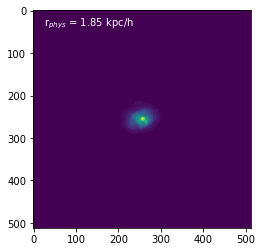

In [41]:
img_dir = '/Users/f566998/Code/DeepLearning/ALL_referee_report/source_images/stacked'
image_files = glob.glob('{}/*.fits'.format(img_dir))
for filename in image_files:
    img = getdata(filename).copy()
    r_size = calc_r_size(img)
    plt.clf()
    plt.imshow(img)
    plt.annotate('r$_{phys}$ = ' + str(round(r_size, 2)) + ' kpc/h',
                 xy=(0.1,0.9), xytext=(0.05,0.93), textcoords='axes fraction', color='white')
    #plt.show()
    plt.savefig('{}/png/{}.png'.format(img_dir, '.'.join(filename.split('/')[-1].split('.')[:-1])))

In [ ]:
#from skimage import exposure
#better_contrast = exposure.rescale_intensity(img, in_range='image', out_range='dtype')